In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
%matplotlib inline

In [14]:
mpl.rc('figure',figsize=(12,9))
mpl.rc('font',size=15)
mpl.rc('axes.spines',top=False, right=False)

分析年度乘客总量变化情况（折线图）

In [4]:
data = sns.load_dataset('flights')

In [5]:
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [6]:
per_year_data = data.groupby('year').sum()

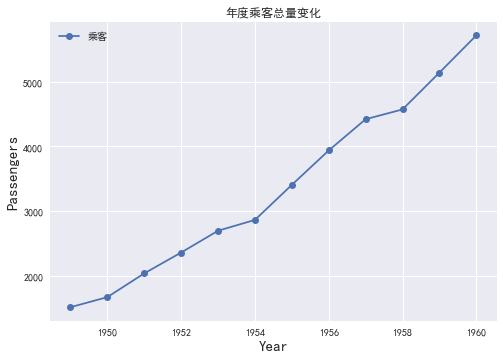

In [13]:
plt.plot(per_year_data.index, per_year_data.values, marker='o', label='乘客')
plt.rc('font', family='SimHei')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.legend(loc='best')
plt.grid(True)
plt.title('年度乘客总量变化')

In [14]:
# 分析乘客在一年中各月份的分布（柱状图）

In [17]:
per_month_data = data.groupby('month').agg(['mean','std'])['passengers']

In [18]:
per_month_data

,mean,std
month,,
January,241.750000,101.032960
February,235.000000,89.619397
March,270.166667,100.559194
April,267.083333,107.374839
May,271.833333,114.739890
June,311.666667,134.219856
July,351.333333,156.827255
August,351.083333,155.783333
September,302.416667,123.954140


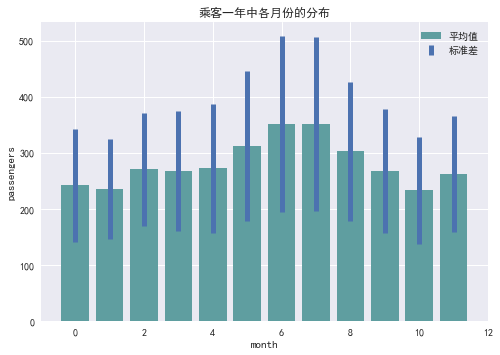

In [25]:
plt.rc('font', family='SimHei')
plt.bar(range(12), per_month_data['mean'],label='平均值', color='cadetblue')
plt.errorbar(range(12), per_month_data['mean'], yerr=per_month_data['std'], lw=5,label='标准差',ls='none')
plt.xlabel('month')
plt.ylabel('passengers')
plt.legend(loc='best')
plt.title('乘客一年中各月份的分布')

In [26]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [42]:
group_by_month_year = data.groupby(['year','month']).agg({'passengers':'sum'}).reset_index()

In [32]:
year_value = data.groupby('year').mean().index.values

In [33]:
month_x = data.groupby('month').mean().index.values

In [34]:
y_data = []

In [51]:
for t_year in year_value:
    y_data.append(group_by_month_year[group_by_month_year["year"].isin([t_year])]["passengers"])

In [54]:
y_data[0]

0     112
1     118
2     132
3     129
4     121
5     135
6     148
7     148
8     136
9     119
10    104
11    118
Name: passengers, dtype: int64

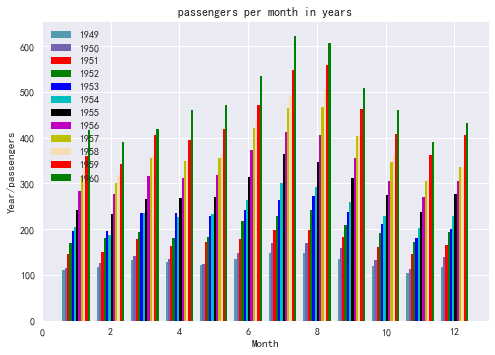

In [56]:
# month/year and passengers
import numpy as np
# 绘制分组柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2-ind_width/2, ind_width)
#     alteration = np.arange(-total_width/2, total_width/2-ind_width, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')


group_by_month_year = data.groupby(["year","month"]).agg({"passengers":"sum"}).reset_index()
year_value = data.groupby("year").mean().index.values
month_x =  data.groupby("month").mean().index.values
y_data = []
for t_year in year_value:
    y_data.append(group_by_month_year[group_by_month_year["year"].isin([t_year])]["passengers"])
    
#调用绘图函数
groupedbarplot(x_data = [1,2,3,4,5,6,7,8,9,10,11,12]
               , y_data_list = y_data
               , y_data_names = year_value
               , colors = ['#539caf', '#7663b0','r','g','b','c','k','m','y','wheat','r','g','c']
               , x_label = 'Month'
               , y_label = 'Year/passengers'
               , title = 'passengers per month in years')


In [57]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
# 萼片（sepal）和花瓣（petal）的大小关系(散点图)

In [59]:
data['sepal_size'] = data['sepal_length'] * data['sepal_width']
data['petal_size'] = data['petal_length'] * data['petal_length']

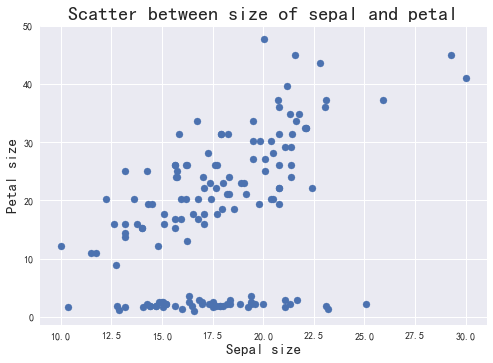

In [77]:
data.head()
_,axe = plt.subplots()
plt.scatter(data['sepal_size'].values,data['petal_size'].values)
plt.xlabel('Sepal size', fontsize=15)
plt.ylabel('Petal size', fontsize=15)
plt.title('Scatter between size of sepal and petal', fontsize=20)
axe.spines['top'].set_color(None)
axe.spines['right'].set_color(None)

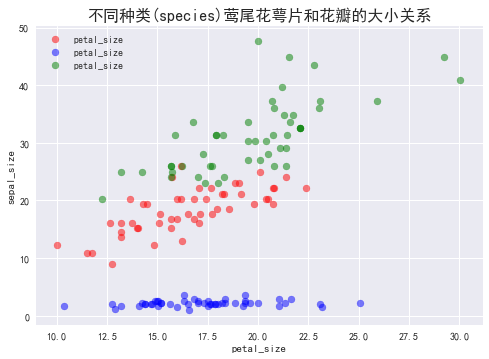

In [79]:
fig, ax = plt.subplots()
colors = ['red', 'blue', 'green']
species = data['species'].value_counts().index
data1 = data.set_index(['species'])
for i,s in enumerate(species):
    ax.scatter(data1['sepal_size'].loc[s], data1['petal_size'].loc[s], color=colors[i],
              alpha=0.5)
    ax.legend(loc='best')
    ax.set_xlabel('petal_size')
    ax.set_ylabel('sepal_size')
    ax.set_title('不同种类(species)莺尾花萼片和花瓣的大小关系', fontsize=16)

sepal_size
petal_size


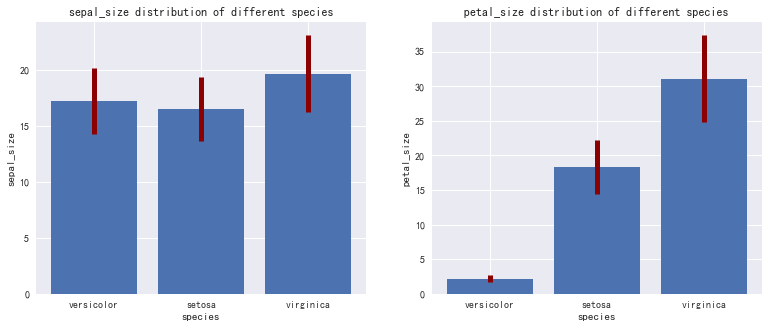

In [85]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
species = data['species'].value_counts().index
sepals = [data1['sepal_size'].loc[s] for s in species]
petals = [data1['petal_size'].loc[s] for s in species]
distribute = data.groupby('species').agg(['mean','std'])
for i,s in enumerate(['sepal_size', 'petal_size']):
    print(s)
    axes[i].bar(range(3), distribute[s]['mean'])
    axes[i].errorbar(range(3), distribute[s]['mean'], distribute[s]['std'], ls='none', lw=5, color='darkred')
    axes[i].set_ylabel(s)
    axes[i].set_xlabel('species')
    axes[i].set_title('{} distribution of different species'.format(s))
plt.setp(axes, xticks=range(3),xticklabels=species)

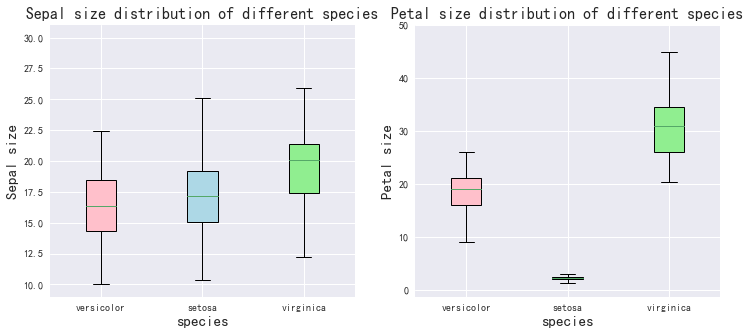

In [91]:
_,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sepals = [data1['sepal_size'].loc[s] for s in species]
petals = [data1['petal_size'].loc[s] for s in species]

bplot0 = axes[0].boxplot(sepals, patch_artist=True)
bplot1 = axes[1].boxplot(petals, patch_artist=True)

axes[0].set_title(u'Sepal size distribution of different species', fontsize=16)
axes[1].set_title(u'Petal size distribution of different species', fontsize=16)
axes[0].set_ylabel('Sepal size', fontsize=15)
axes[1].set_ylabel('Petal size', fontsize=15)

colors=['pink','lightblue','lightgreen']
for bplot in (bplot0,bplot1):
    for patch, color in zip(bplot['boxes'],colors):
        patch.set_facecolor(color)
plt.setp(axes,xticks=list(range(1,len(species)+1)),xticklabels=species)
for a in axes:
    a.set_xlabel('species', fontsize=15)
    a.grid(True)
    


In [4]:
data = sns.load_dataset('tips')

In [5]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* 小费和总消费之间的关系（散点图）

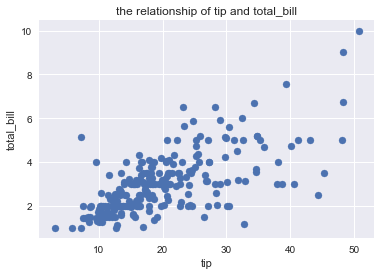

In [8]:
plt.scatter(data.total_bill, data.tip)
plt.xlabel('tip')
plt.ylabel('total_bill')
plt.title('the relationship of tip and total_bill')

* 男性顾客和女性顾客，谁更慷慨（分类箱式图）

In [9]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


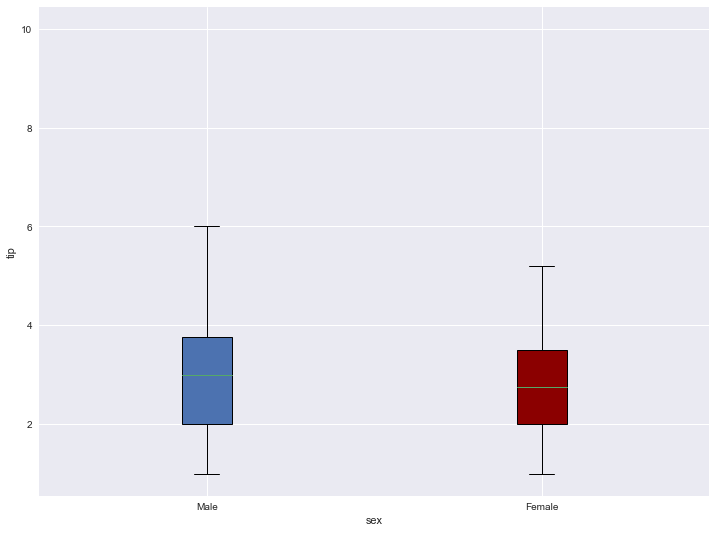

In [20]:
_,axe = plt.subplots()
sex = data['sex'].value_counts().index
sex_distr=[data[data['sex']==s]['tip'] for s in sex]
bplot = axe.boxplot(sex_distr,patch_artist=True)
bplot['boxes'][1].set_facecolor('darkred')
# plt.setp(axe, xticks=[1,2], xticklabels=sex)
plt.xticks([1,2],sex)
plt.xlabel('sex')
plt.ylabel('tip')
plt.grid(True)


* 抽烟与否是否会对小费金额产生影响（分类箱式图）

In [22]:
is_smoke = ['No','Yes']

In [23]:
smoke_distri = [data[data['smoker']==s]['tip'] for s in is_smoke]

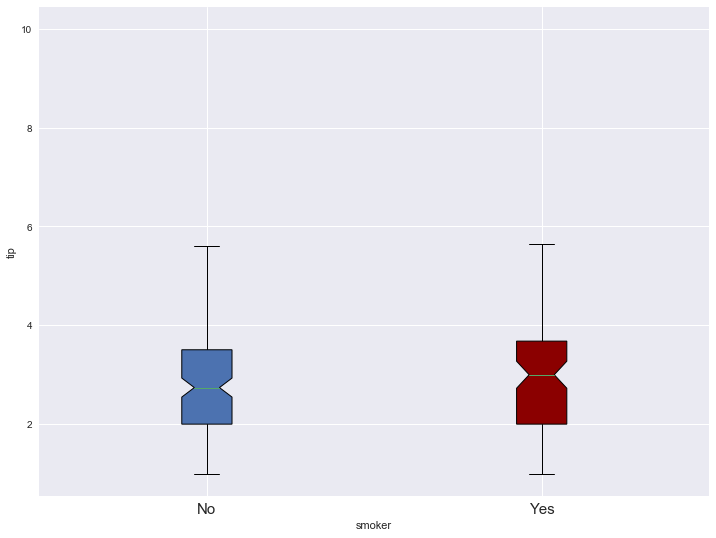

In [32]:
boxpl = plt.boxplot(smoke_distri, patch_artist=True, notch=True)
boxpl['boxes'][1].set_facecolor('darkred')
plt.xlabel('smoker')
plt.xticks([1,2],is_smoke,fontsize=15)
plt.ylabel('tip')

* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

In [36]:
data['is_weekend'] = data['day'].apply(lambda x: 1 if x=='Sat' or x=='Sun' else 0)

([<matplotlib.axis.XTick at 0x268fae96630>,
 <a list of 2 Text xticklabel objects>)

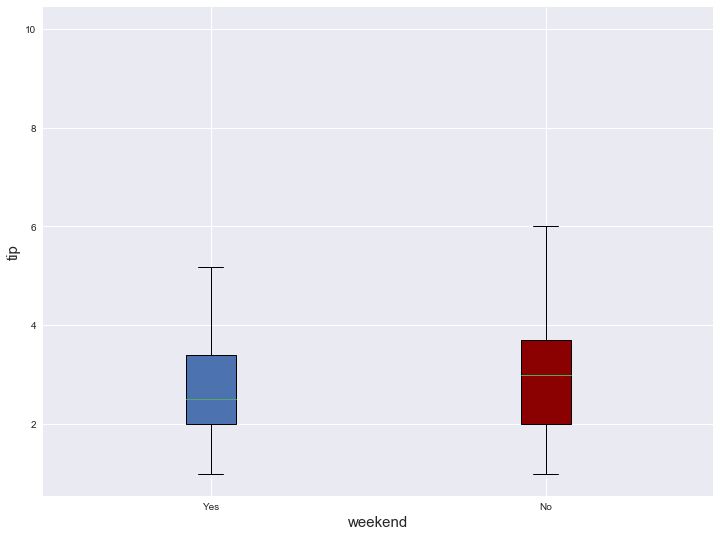

In [43]:
is_weekend = [0,1]
week_distri = [data[data['is_weekend']==s]['tip'] for s in is_weekend]
boxes = plt.boxplot(week_distri, patch_artist=True)
boxes['boxes'][1].set_facecolor('darkred')
plt.xlabel('weekend', fontsize=15)
plt.ylabel('tip', fontsize=15)
plt.xticks([1,2], ['Yes','No'])

In [52]:
data.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [73]:
def multi_box(data, x, y):
    index = data[x].value_counts().index
    distri = [data[data[x]==s][y] for s in index]
    boxes = plt.boxplot(distri, patch_artist=True)
    colors = ['b','red','green','magenta','cyan','yellow','black','white']
    for color, box in zip(colors, boxes['boxes']):
        box.set_facecolor(color)
    plt.xlabel(x, fontsize=15)
    plt.xticks(list(range(1,len(index)+1)), index, fontsize=15)
    plt.ylabel(y,fontsize=15)

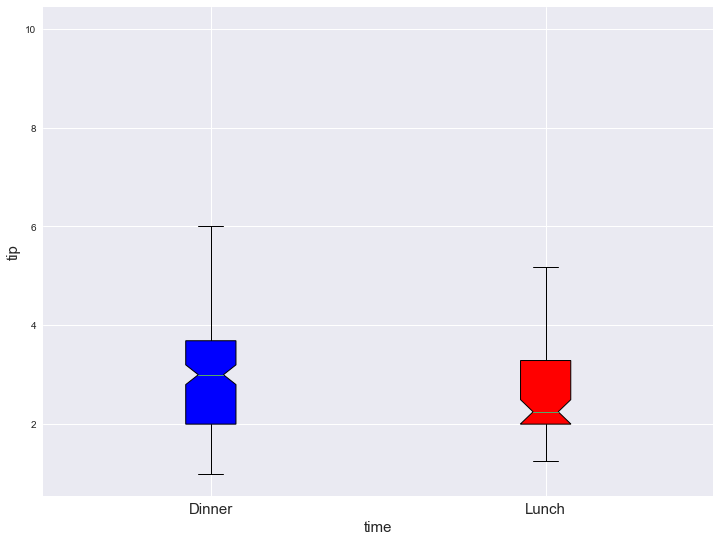

In [71]:
multi_box(data, 'time', 'tip')

* 就餐人数是否会对慷慨度产生影响（分类箱式图）

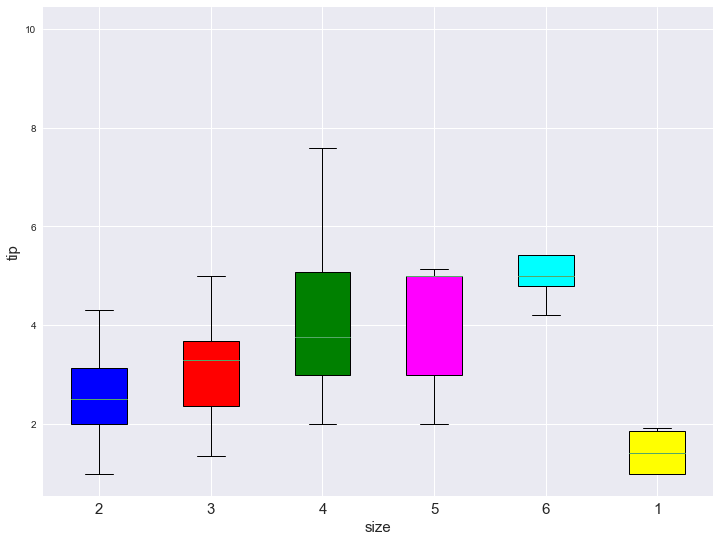

In [74]:
multi_box(data, 'size', 'tip')

* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [81]:
tmp_data = data.groupby(['sex','smoker'])['tip'].agg(['mean','std'])

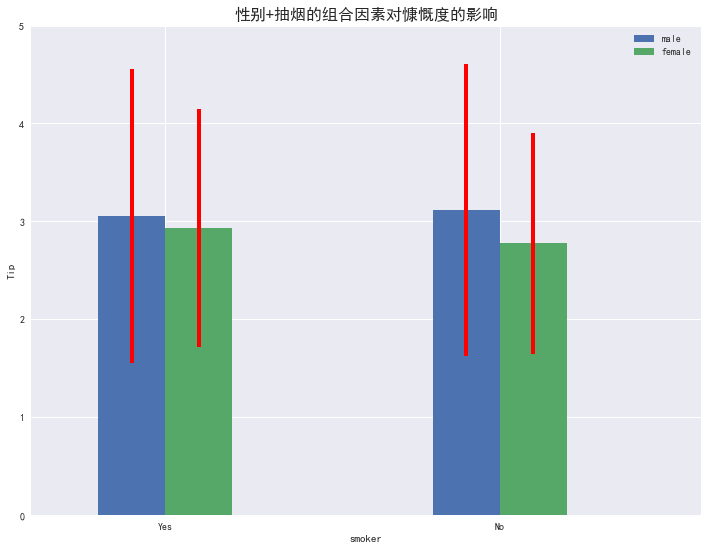

In [110]:
plt.bar([1,2], tmp_data['mean'].loc['Male'], width=0.2,label='male')
plt.errorbar([1,2], tmp_data['mean'].loc['Male'], tmp_data['std'].loc['Male'], ls='none', lw=4, color='red',label=None)
plt.bar([x+0.2 for x in [1,2]], tmp_data['mean'].loc['Female'], width=0.2, label='female')
plt.errorbar([x+0.2 for x in [1,2]], tmp_data['mean'].loc['Female'], tmp_data['std'].loc['Female'], ls='none', lw=4, color='red', label=None)
plt.xlabel('smoker')
plt.xticks([1.1,2.1],['Yes','No'])
plt.ylabel('Tip')
plt.axis([0.7,2.7,0,5])
plt.legend()
plt.rc('font', family='SimHei')
plt.title(u'性别+抽烟的组合因素对慷慨度的影响', fontsize=16)

In [112]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [157]:
data1 = data.groupby(['alive','pclass'])['survived'].count().unstack()

In [182]:
data1.loc['yes'].reset_index()['yes']

0    0.629630
1    0.472826
2    0.242363
Name: yes, dtype: float64

In [186]:
def pile_bar(data,pile_col,clsf_col):
    data1 = data.groupby([pile_col,clsf_col])['survived'].count()
    data1 = data1.unstack()
    data1 = data1/data1.sum()
    x_data = range(len(data1.columns))
    q = pd.Series([0 for i in x_data])
    bottom = q
    colors = ['#539caf', '#7663b0','darkorange']
    _,axe = plt.subplots()
    for c,p in zip(colors,data1.index):
        bottom += q
        plt.bar(x_data, data1.loc[p],bottom=bottom,label=p,width=0.15*len(data1.columns),color=c)
        q = data1.loc[p].reset_index()[p]
    plt.xlabel(data1.columns.name,fontsize=20)
    plt.xticks(x_data,data1.columns, fontsize=15)
    plt.ylabel('passengers survived',fontsize=20)
    plt.legend(fontsize=15)
    axe.spines['top'].set_color(None)
    axe.spines['right'].set_color(None)

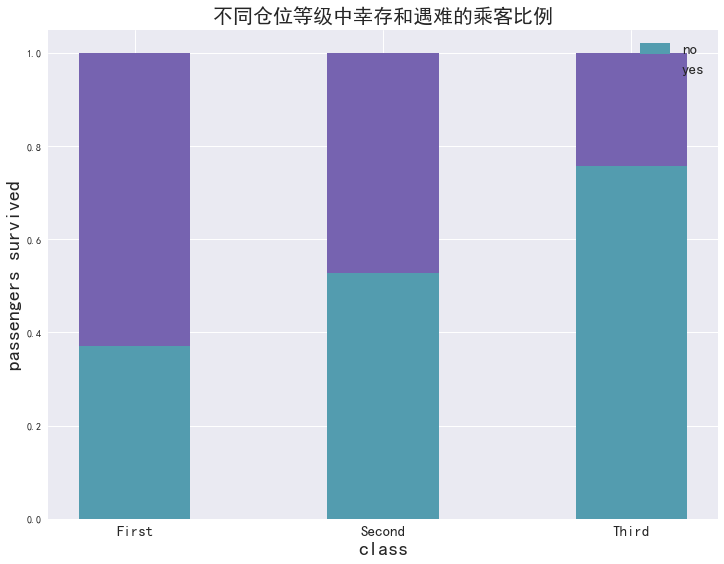

In [187]:
pile_bar(data,'alive','class')
plt.title(u'不同仓位等级中幸存和遇难的乘客比例',fontsize=20)

In [197]:
data.groupby(['class','embark_town'])['survived'].count().unstack()

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


In [207]:
def multi_bar(data,multi_col,clsf_col):
    data1 = data.groupby([multi_col,clsf_col])['survived'].count()
    data1 = data1.unstack()
    x_data = range(len(data1.columns))
    x_data = pd.Series(x_data)
    width = 0.2
    xmean = x_data.mean()
    
    for i,p in enumerate(data1.index):
        plt.bar(x_data+width*(i-xmean),data1.loc[p],label=p,width=width)
    
    plt.xlabel(data1.columns.name,fontsize=15)
    plt.xticks(x_data,data1.columns)
    plt.ylabel('passengers',fontsize=15)
    plt.legend()

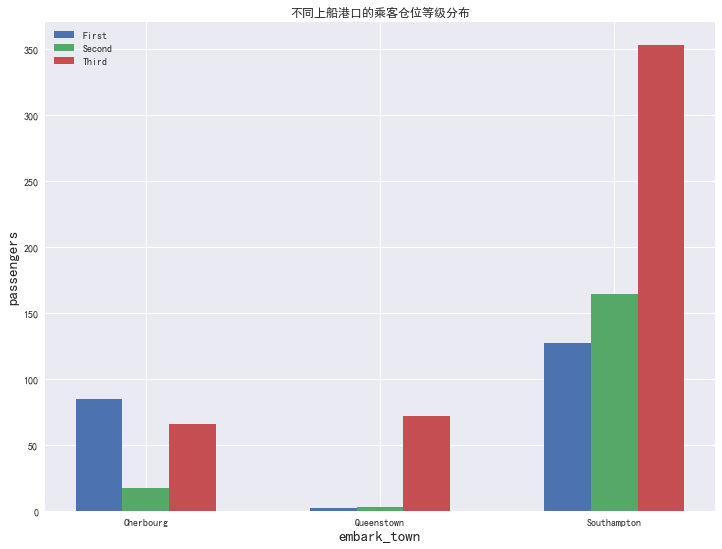

In [208]:
multi_bar(data,'class','embark_town')
plt.title(u'不同上船港口的乘客仓位等级分布')